Load Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ydata_profiling  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [73]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=cols)
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [74]:
data.shape

(1728, 7)

In [75]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [76]:
for col in cols:
    print(f"Column: {col}")
    print(data[col].value_counts().reset_index(drop=True), end='\n\n')

Column: buying
0    432
1    432
2    432
3    432
Name: count, dtype: int64

Column: maint
0    432
1    432
2    432
3    432
Name: count, dtype: int64

Column: doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64

Column: persons
0    576
1    576
2    576
Name: count, dtype: int64

Column: lug_boot
0    576
1    576
2    576
Name: count, dtype: int64

Column: safety
0    576
1    576
2    576
Name: count, dtype: int64

Column: class
0    1210
1     384
2      69
3      65
Name: count, dtype: int64



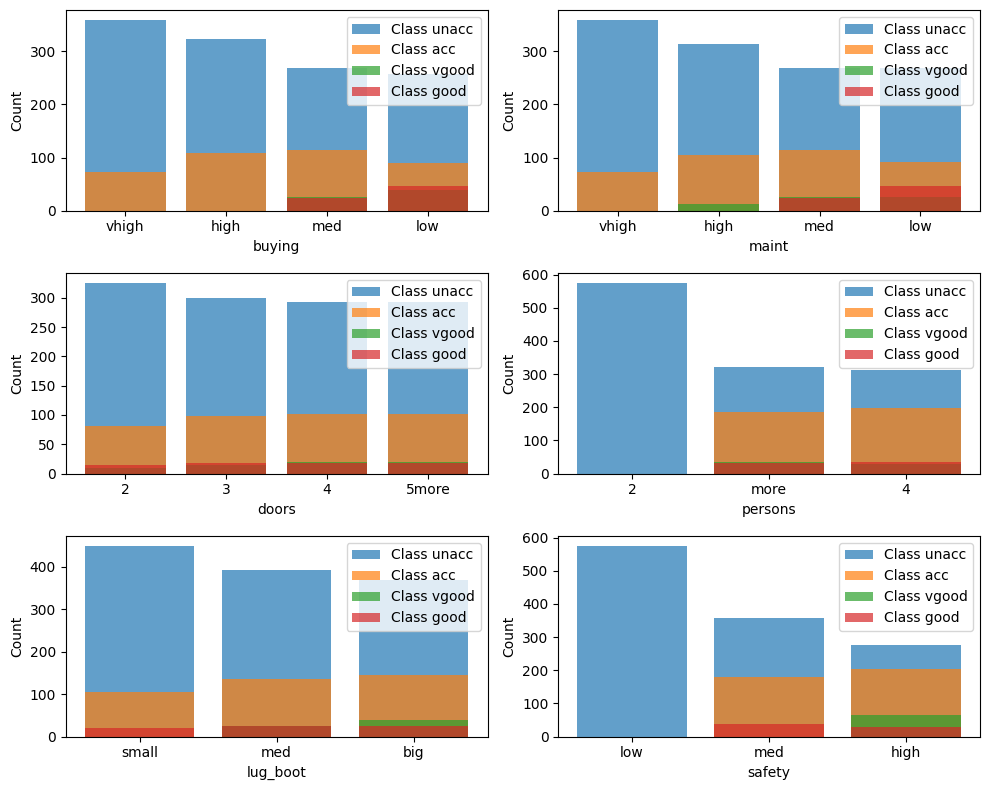

In [77]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(cols[:-1]):
    plt.subplot(3, 2, i+1)
    classes = data['class'].unique()
    
    for cls in classes:
        counts = data[data['class'] == cls][col].value_counts()
        plt.bar(counts.index, counts.values, alpha=0.7, label=f'Class {cls}')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


In [78]:
data.profile_report(title='Profile_Report', progress_bar=False)

In [79]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [80]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)


In [82]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('SVM', SVC()),
]
for name, model in models:
    model.fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    print('{}: {}'.format(name, score))

LR: 0.695369030390738
KNN: 0.9421128798842258
DT: 1.0
SVM: 0.9392185238784371


In [83]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print('KNN:', score)

KNN: 0.9104046242774566


In [84]:
preds = model.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         acc       0.82      0.82      0.82        77
        good       0.86      0.43      0.57        14
       unacc       0.94      1.00      0.97       242
       vgood       1.00      0.38      0.56        13

    accuracy                           0.91       346
   macro avg       0.90      0.66      0.73       346
weighted avg       0.91      0.91      0.90       346



In [85]:
model_name = 'car_eval.pkl'
with open(model_name, 'wb') as model_file:
    pickle.dump(model, model_file)

In [86]:
model_name = 'car_eval.pkl'
with open(model_name, 'rb') as model_file:
    loaded_model = pickle.load(model_file)
result = loaded_model.score(X_test, Y_test)
print('Score:', result)

Score: 0.9104046242774566
